# Project Number-18 (Big Megamart Dataset)

In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv('bigmart.csv')
d
# this Dataset contains information about megamart. There are various aspects that determines the sales such as location of store, size of store, fat content of the products etc. All these are independant input attributes
# we have analyze and predict the optimum sales of the megamrt under best possible designed model.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df1=pd.DataFrame(data=d)
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# EDA

In [4]:
df1.columns
# checking the attributes

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df1.info()
# this dataset contains 8523 entries(rows) & 12 columns
# Item weight & Outlet Size contains missing entries
# Datatyoes of all attributes are mentioned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df1['Item_Fat_Content'].unique()
# checking the different categories of fat content

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
df1['Item_Type'].unique()
# checking the different categories of items sold in megamart

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [8]:
df1['Outlet_Establishment_Year'].value_counts()
# Number of stores have been added over the years

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [9]:
df1['Outlet_Size'].unique()
# checking the different categories of outlet size

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
df1['Outlet_Size'].value_counts()
# there are three categries of outlets

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
df1['Outlet_Location_Type'].value_counts()
#checking the different categories of location of outlets present

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [12]:
df1['Outlet_Type'].value_counts()
# checking the number of outlets of each categories 

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [13]:
df1['Item_Weight']=df1['Item_Weight'].replace(np.NaN,df1['Item_Weight'].mean())
# replacing the missig values of Item weight with mean value of all entries of the particular column

In [14]:
imp=SimpleImputer(strategy='most_frequent')
df1['Outlet_Size']=imp.fit_transform(df1['Outlet_Size'].values.reshape(-1,1))
# replacing the missig values of Outlet Size with most frequent entry of all entries of the particular column

In [15]:
le=LabelEncoder()
# converting the object datatype attributes into numerical columns so that all kind of statistical analysis can be carried out

In [16]:
df1['Item_Fat_Content']=le.fit_transform(df1['Item_Fat_Content'])

In [17]:
df1['Item_Type']=le.fit_transform(df1['Item_Type'])

In [18]:
df1['Outlet_Size']=le.fit_transform(df1['Outlet_Size'])

In [19]:
df1['Outlet_Location_Type']=le.fit_transform(df1['Outlet_Location_Type'])

In [20]:
df1['Outlet_Type']=le.fit_transform(df1['Outlet_Type'])

In [21]:
df1['Outlet_Identifier']=le.fit_transform(df1['Outlet_Identifier'])

In [22]:
df1['Outlet_Establishment_Year']=le.fit_transform(df1['Outlet_Establishment_Year'])

In [23]:
df1['Item_Identifier']=le.fit_transform(df1['Item_Identifier'])

In [24]:
df1.head()
# this dataset contains all numerical entries

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1,0,2,1,994.7052


In [25]:
df1.shape

(8523, 12)

# Univariate Analysis

In [26]:
df1.skew()
# checking the skewness

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year    0.034270
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x24e1937c448>,
 'caps': [<matplotlib.lines.Line2D at 0x24e19395f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e19387c08>],
 'medians': [<matplotlib.lines.Line2D at 0x24e1939df08>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e193a5d88>],
 'means': []}

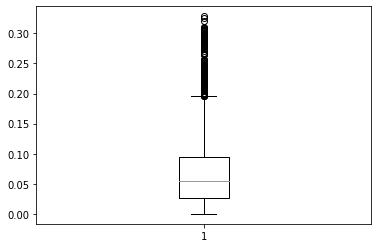

In [27]:
plt.boxplot(df1['Item_Visibility'])
# this attributes contain outliers

In [67]:
df1['Item_Visibility']=np.log(df1['Item_Visibility'])
# log transforming in order to minimise the skewness of this attribute

{'whiskers': [<matplotlib.lines.Line2D at 0x24e1bc95e08>,
 'caps': [<matplotlib.lines.Line2D at 0x24e1bcb2e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e1bcb4d08>],
 'medians': [<matplotlib.lines.Line2D at 0x24e1bcb2f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e1bcaae48>],
 'means': []}

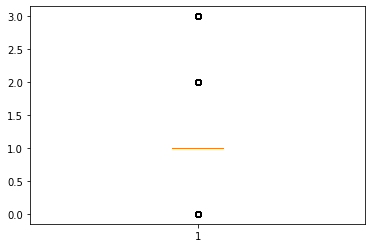

In [68]:
plt.boxplot(df1['Outlet_Type'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x24e1bd165c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x24e1bd0f748>,
 'cmins': <matplotlib.collections.LineCollection at 0x24e1bd167c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x24e1bd16888>}

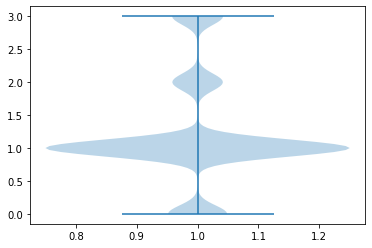

In [69]:
plt.violinplot(df1['Outlet_Type'])
# Supermarket Type 1 is having most number of outlets

{'bodies': [<matplotlib.collections.PolyCollection at 0x24e1bd78bc8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x24e1bd70d08>,
 'cmins': <matplotlib.collections.LineCollection at 0x24e1bd844c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x24e1bd84808>}

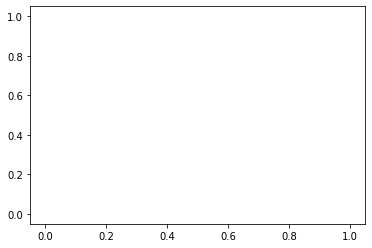

In [70]:
plt.violinplot(df1['Item_Visibility'])

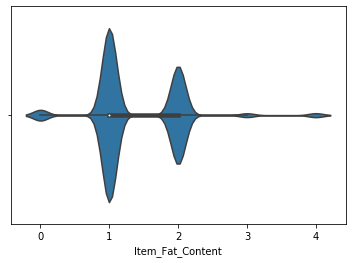

In [71]:
sns.violinplot(x='Item_Fat_Content',data=df1)
# 'Low Fat' category items are having most number of entries

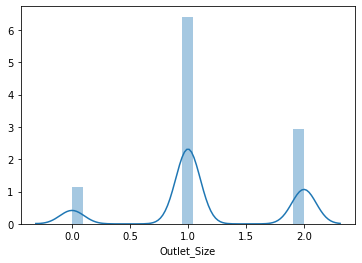

In [72]:
sns.distplot(df1['Outlet_Size'])
# three type of outlet sizes are present in the dataset

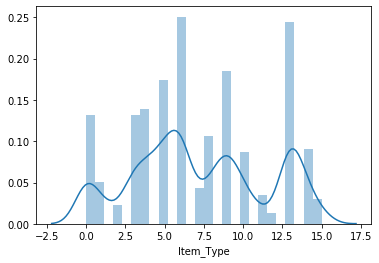

In [73]:
sns.distplot(df1['Item_Type'])
# various kinds of items are sold through these megamart and these entries are normally distributed

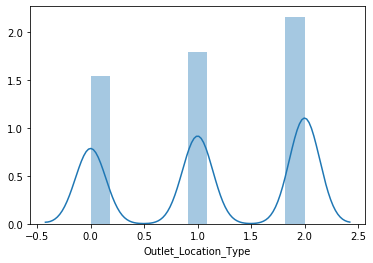

In [74]:
sns.distplot(df1['Outlet_Location_Type'])
# outlets are present in three different Tier locations

In [75]:
df1['Outlet_Location_Type'].value_counts()
# checking the number of counts onf each tier location

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

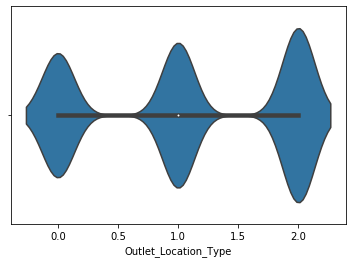

In [76]:
sns.violinplot(x='Outlet_Location_Type',data=df1)
# another pictorial representation of outlet locations among three different tier locations

# Bivariate Analysis

#Here we have to analyse the behaviour of each attributes against target -Item Outlet Sales

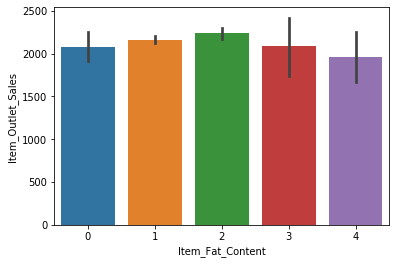

In [77]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df1)

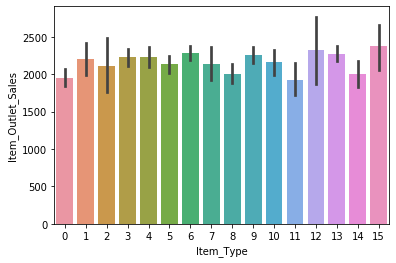

In [85]:
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=df1)

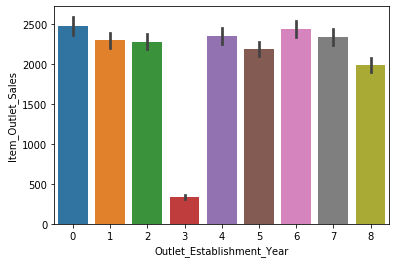

In [79]:
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df1)
# outlets established in 1998 is having least contribution to the sales

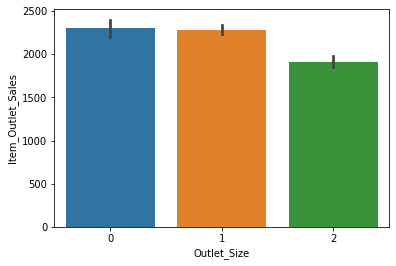

In [80]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df1)
# small outlets are having least contribution to the sales

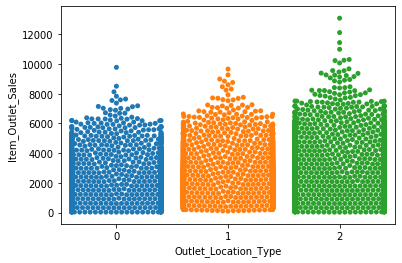

In [81]:
sns.swarmplot(data=df1,x='Outlet_Location_Type',y='Item_Outlet_Sales')
# trying to understnad the contribution of different tier located outets towards sales. but this swarmploy doesnt provide clear information. 

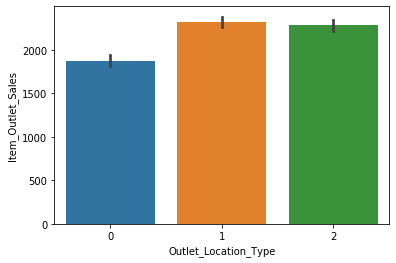

In [82]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df1)
# outlets present in Tier2 areas are having maximum contribution towrads sales

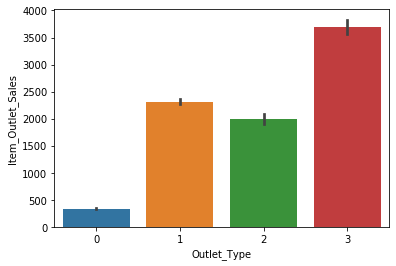

In [83]:
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df1)
# Supermarket type3 is giving more sales among other outlet type categories

In [45]:
df1.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,3.790684,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,2.730322,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,4.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,6.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,8.000000,2.000000,2.000000,3.000000,13086.964800


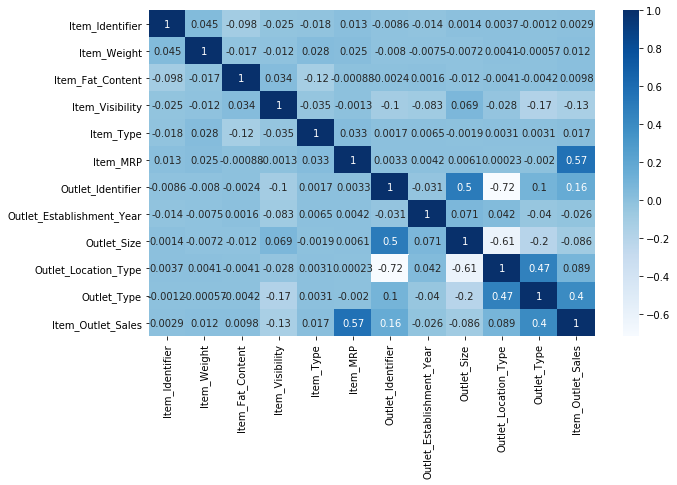

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),cmap='Blues',annot=True)
# checking the corelation among all attributes of the dataset using heatmap
# we can see most of the attributes are positively corelated with sales. only Item visibilty reflects negative relation with sales

In [47]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1,0,2,1,994.7052


In [48]:
df1.shape

(8523, 12)

# Data Cleaning

In [49]:
df2=df1.copy()
# creating to copy of the original dataset. 
# we will carry the data cleaning exercise on copied version of the dataset.

In [50]:
z=np.abs(zscore(df2))
z
# checking zscore values accross all entries

array([[1.38851383, 0.84187169, 0.57284357, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.71799137, 1.64170589, 0.97809218, ..., 1.09156913, 1.00297245,
        1.01844035],
       [0.26205684, 1.09855449, 0.57284357, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [1.28515188, 0.53424315, 0.57284357, ..., 0.13888236, 0.25265831,
        0.57909963],
       [0.21975905, 1.33644372, 0.97809218, ..., 1.09156913, 1.00297245,
        0.19672492],
       [1.62449099, 0.45963367, 0.57284357, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [51]:
print(np.where(z>3))
# considering the zscore threshold value to be 3 in order identify the outliers. 
# outliers should be remoded from the dataset inorder to train the model better and get the higher accuracy on slaes prediction

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [52]:
df2_new=df2[(z<3).all(axis=1)]
df2_new.shape
# entries with outliers have been removed from the dataset. now this dataset can be used for machine learning

(8222, 12)

# Setting Up Evaluation Protocol

In [54]:
x=df2_new.iloc[:,0:-1]
# independant input variables

In [55]:
y=df2_new.iloc[:,-1]
# Target variable

In [56]:
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lm=LinearRegression(normalize=True)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    score=lm.score(x_train,y_train)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('Maximum score corresponding to random state',finalr,'is',maxr)

# Since the target attribute is having continuous values, we can apply Linear Regression to train the model
# we optimise the seed value here identify the random state

accuracy score correspondng to random state 41 is: 0.4972284061344838
accuracy score correspondng to random state 42 is: 0.49530495104627936
accuracy score correspondng to random state 43 is: 0.4959676121988138
accuracy score correspondng to random state 44 is: 0.501098962543697
accuracy score correspondng to random state 45 is: 0.4942910628277589
accuracy score correspondng to random state 46 is: 0.5014753441031623
accuracy score correspondng to random state 47 is: 0.5051635164455557
accuracy score correspondng to random state 48 is: 0.4917891738315963
accuracy score correspondng to random state 49 is: 0.49701897337663636
accuracy score correspondng to random state 50 is: 0.5066412537326936
accuracy score correspondng to random state 51 is: 0.506390260283213
accuracy score correspondng to random state 52 is: 0.5009046316067864
accuracy score correspondng to random state 53 is: 0.5011194724623215
accuracy score correspondng to random state 54 is: 0.5012600242214489
accuracy score corre

# Training the Model & Prediction 

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=72,test_size=0.3)

In [58]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [59]:
lm.score(x_train,y_train)

0.5108269615081049

In [60]:
pred=lm.predict(x_test)

In [61]:
print(r2_score(y_test,pred))

0.47095987232764214


In [ ]:
# The model score is not good enough. we have to try other algorithms to train the model better

In [62]:
cv=cross_val_score(lm,x,y,cv=5)
print(cv.mean())
# trying cross validation method with kfold value=5

0.49655973198173947


In [ ]:
# the model didnt improve through cross validation method
# so we have to try different ensemble techniques to boost the score

In [63]:
model=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    Predr=m.predict(x_test)
    print(m.score(x_train,y_train))
    print('\n')
    
## RandomForest is providing maximum score. so will use this to train the model

0.9370222669656725


0.5742382785453761


0.6347932939223858




In [64]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(rf.score(x_train,y_train))
print(predr)
print('\n')

0.9374361746366926
[1778.724648 1979.150422 2440.210264 ...  948.685104 1955.601076
 2345.97959 ]




# Saving the Model

In [65]:
joblib.dump(rf,'rfmegamart.obj')

['rfmegamart.obj']